In [ ]:
# import packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib import pylab
import seaborn as sns
sns.set_theme(style="white",font_scale = 2)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import text
import datetime as dt
import time
from datetime import datetime, date, time, timedelta
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


## **Porometer - gsw/Tr**

In [ ]:
# creat df for porometer data:
file_path = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/porometer/all_dates.xlsx'
df = pd.read_excel(file_path) # reading the raw date (xlsx)
df['Hour'] = pd.to_datetime(df.Hour,format='%H:%M:%S')
df['Hour'] = df['Hour'].dt.strftime('%H:%M') #change the format to hours:minutes
# df.describe()
# df.dtypes
df['date'] = df['date'].fillna(3)
df['date'] = df["date"].astype(int)
df

,date,Hour,Obs#,gsw,E_apparent,gsw_av,gsw_std,Tr_av,Tr_std
0,3,06:00,Chlorophitum,0.012677,0.143036,NaN,NaN,NaN,NaN
1,3,06:00,Chlorophitum,0.005219,0.062151,NaN,NaN,NaN,NaN
2,3,06:00,Chlorophitum,0.015503,0.170499,NaN,NaN,NaN,NaN
3,3,06:00,Chlorophitum,0.011764,0.138237,NaN,NaN,NaN,NaN
4,3,06:00,Chlorophitum,0.004659,0.054524,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3306,3,00:30,Tradescantia,0.002372,0.018789,NaN,NaN,NaN,NaN
3307,3,00:30,Tradescantia,-0.023987,-0.184054,NaN,NaN,NaN,NaN
3308,3,00:30,Tradescantia,-0.000184,-0.001328,NaN,NaN,NaN,NaN
3309,3,00:30,Tradescantia,0.028340,0.195624,NaN,NaN,NaN,NaN


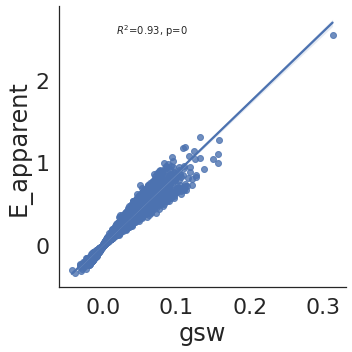

In [ ]:
# look on the corraletion between Tr and gsw - almost 1

import scipy as sp
g = sns.lmplot(x='gsw', y='E_apparent', data=df)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['gsw'], data['E_apparent'])
    ax = plt.gca()
    ax.text(.2, .9, '$R^2$={:.2f}, p={:.2g}'.format(r*r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()
# df[['gsw','E_apparent']].corr()

We want to present the data for each date for each species:

In [ ]:
# create a list of species name:
species = df['Obs#'].drop_duplicates()
species= species.values.tolist() # connert array to list
species

['Chlorophitum',
 'Monalisa',
 'Peperomia',
 'Philodendron',
 'Sphatophilum',
 'Tradescantia']

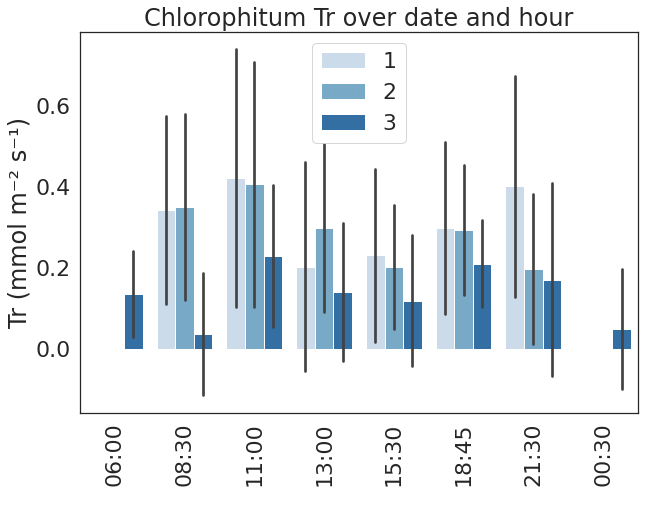

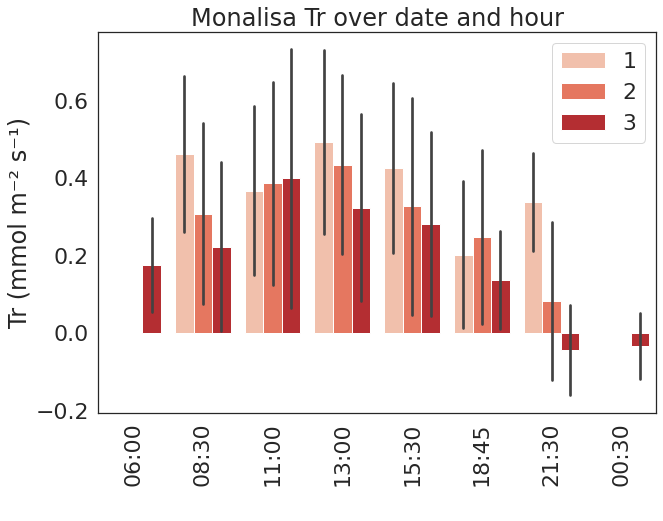

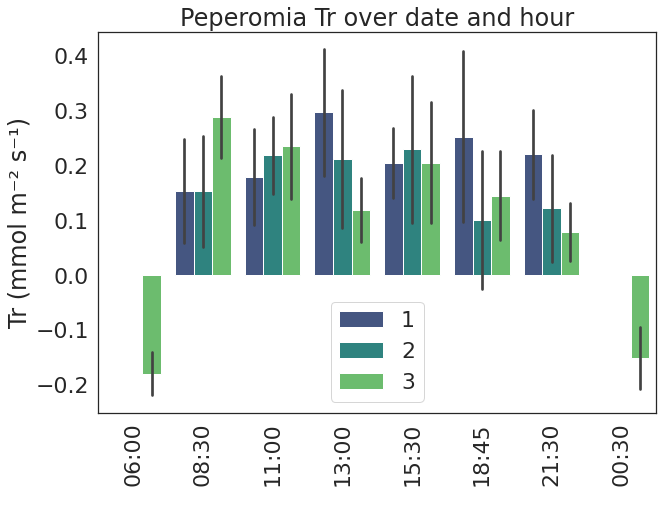

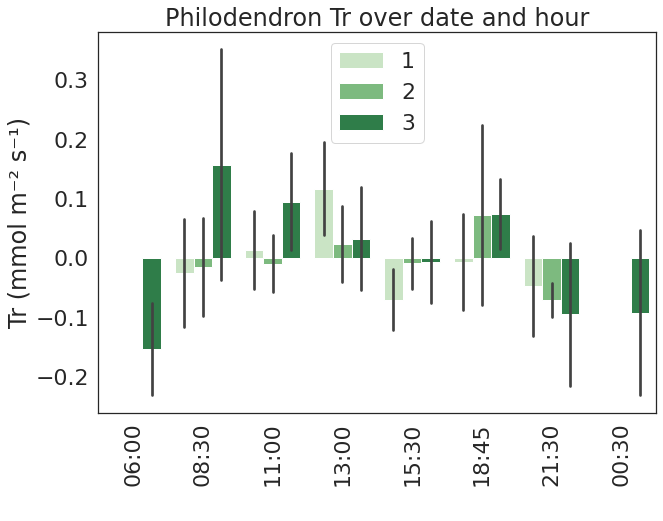

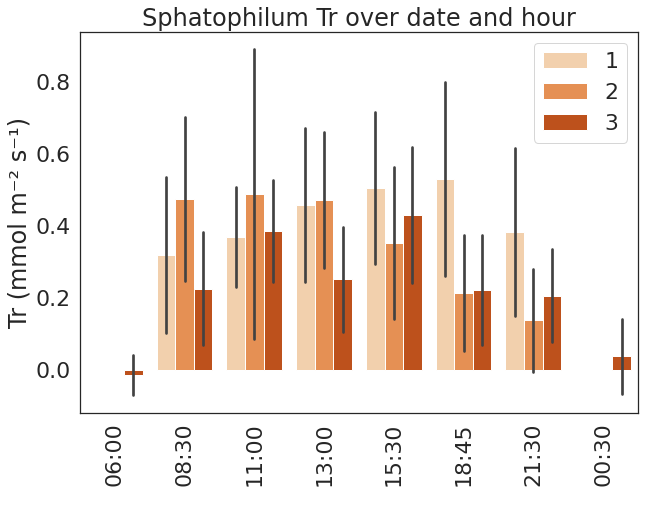

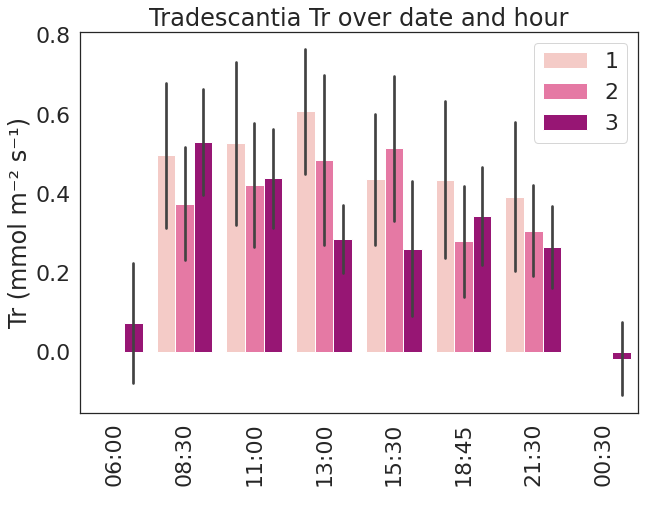

In [ ]:
palette_dict = {'Chlorophitum':"Blues",
 'Monalisa':"Reds",
 'Peperomia':"viridis",
 'Philodendron':"Greens",
 'Sphatophilum':"Oranges",
 'Tradescantia':'RdPu'}
for i in species:
  species_df = df[df['Obs#']== i]
  fig, ax = plt.subplots(1, figsize=(10,7))
  ax = sns.barplot(x="Hour", y="E_apparent", hue="date", data=species_df,ci="sd", palette=palette_dict[i])
  ax.set(xlabel=" ",
       ylabel="Tr (mmol m⁻² s⁻¹)",
       title=i + " Tr over date and hour");
  plt.legend(loc='best')
  plt.xticks(rotation=90)
  save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/Tr/'
  plt.savefig(save_results_to +i+'.png')
  

In [ ]:
df_dict = {i:df[df['Obs#']== i] for i in species}
df_dict.keys()

dict_keys(['Chlorophitum', 'Monalisa', 'Peperomia', 'Philodendron', 'Sphatophilum', 'Tradescantia'])

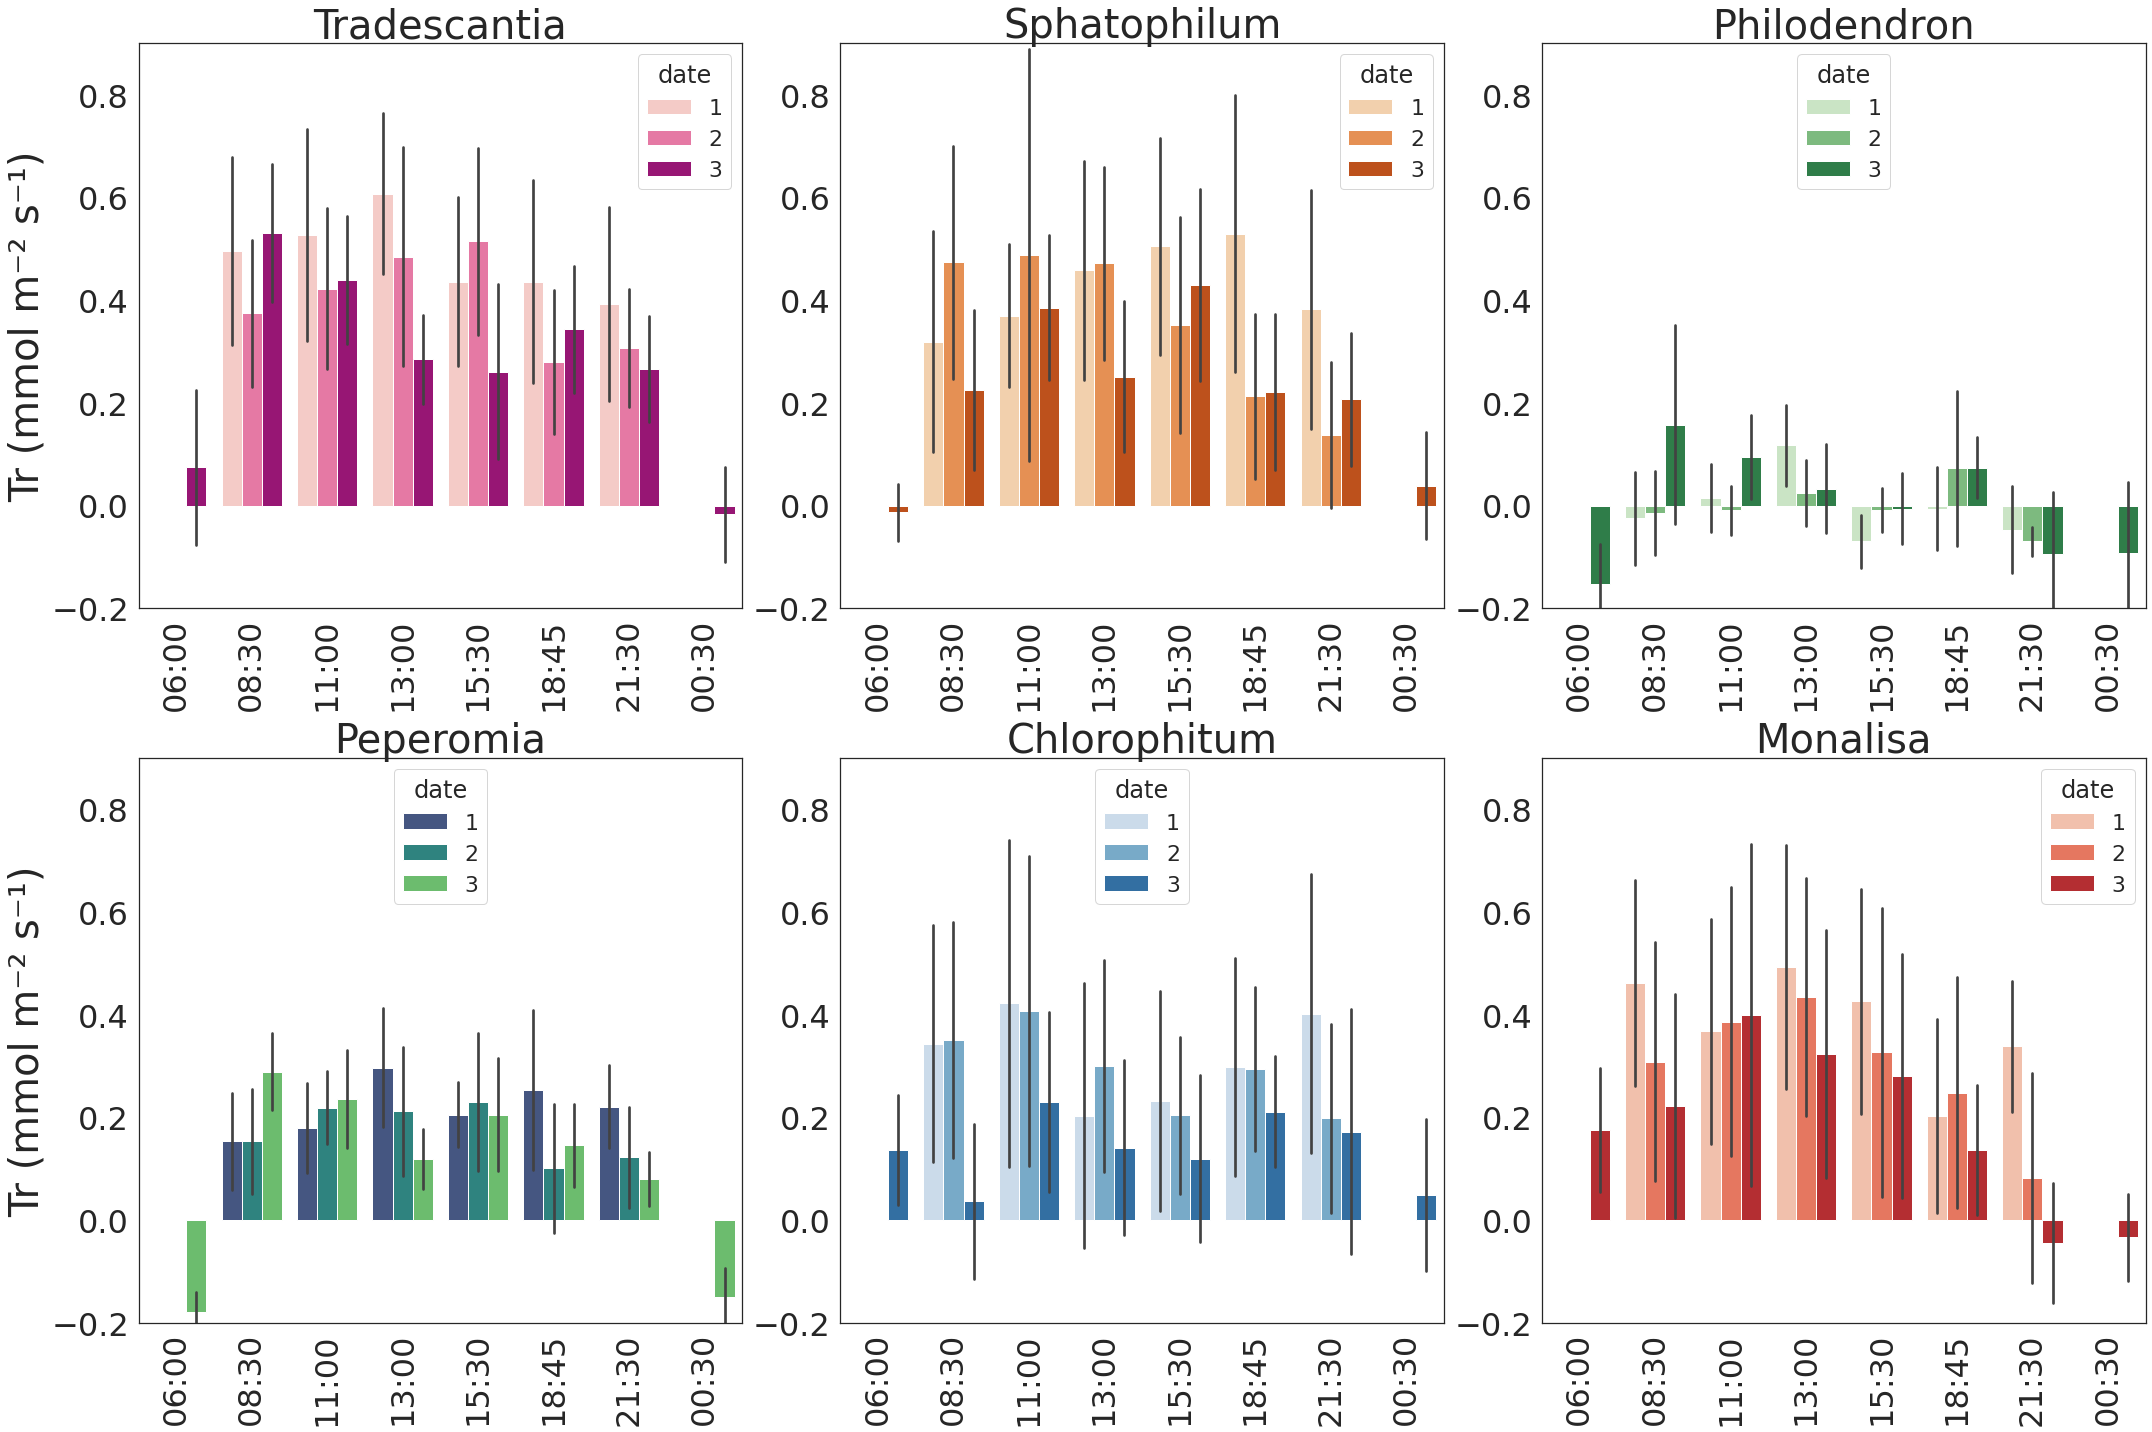

In [ ]:
import matplotlib as mpl
label_size = 32
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

# All graphs togather
fig, axes = plt.subplots(2, 3, figsize=(30,20))
# fig.suptitle('gsw over the date and hour')
a = sns.barplot(ax=axes[0,0], x="Hour", y="E_apparent",
                hue="date", data=df_dict['Tradescantia'], ci="sd", palette="RdPu")
a.set_title('Tradescantia',fontsize=40)
a.set_ylabel('Tr (mmol m⁻² s⁻¹)',fontsize=40)
a.set_xlabel('',fontsize=32)
a.set_ylim(-0.2,0.9)
a.tick_params(axis='x', rotation=90)
# a.set_xticks(ticks=df['Hour'].unique(),rotation=90)
b = sns.barplot(ax=axes[0, 1], x="Hour", y="E_apparent", hue="date",
                data=df_dict['Sphatophilum'], ci="sd", palette="Oranges")
b.set_title('Sphatophilum',fontsize=40)
b.set_xlabel('',fontsize=32)
b.set_ylabel('',fontsize=32)
b.set_ylim(-0.2,0.9)
b.tick_params(axis='x', rotation=90)
c = sns.barplot(ax=axes[0, 2], x="Hour", y="E_apparent", hue="date", data=df_dict['Philodendron'], ci="sd", palette="Greens")
c.set_title('Philodendron',fontsize=40)
c.set_xlabel('',fontsize=32)
c.set_ylabel('',fontsize=32)
c.set_ylim(-0.2,0.9)
c.tick_params(axis='x', rotation=90)
d = sns.barplot(ax=axes[1, 0], x="Hour", y="E_apparent", hue="date", data=df_dict['Peperomia'], ci="sd", palette="viridis")
d.set_title('Peperomia',fontsize=40)
d.set_xlabel('',fontsize=32)
d.set_ylabel('Tr (mmol m⁻² s⁻¹)',fontsize=40)
d.set_ylim(-0.2,0.9)
d.tick_params(axis='x', rotation=90)
e = sns.barplot(ax=axes[1, 1], x="Hour", y="E_apparent", hue="date", data=df_dict['Chlorophitum'],
                ci="sd", palette="Blues")
e.set_title('Chlorophitum',fontsize=40)
e.set_xlabel('',fontsize=32)
e.set_ylabel('',fontsize=32)
e.set_ylim(-0.2,0.9)
e.tick_params(axis='x', rotation=90)
f = sns.barplot(ax=axes[1, 2], x="Hour", y="E_apparent", hue="date", data=df_dict['Monalisa'], ci="sd", palette="Reds")
f.set_title('Monalisa',fontsize=40)
f.set_xlabel('',fontsize=32)
f.set_ylabel('',fontsize=32)
f.set_ylim(-0.2,0.9)
f.tick_params(axis='x', rotation=90)
# f.set_xticklabels(x,rotation = 45)
# plt.gcf().autofmt_xdate()  # makes slated dates
plt.tight_layout()
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/Tr/'
plt.savefig(save_results_to +'All_together.png')

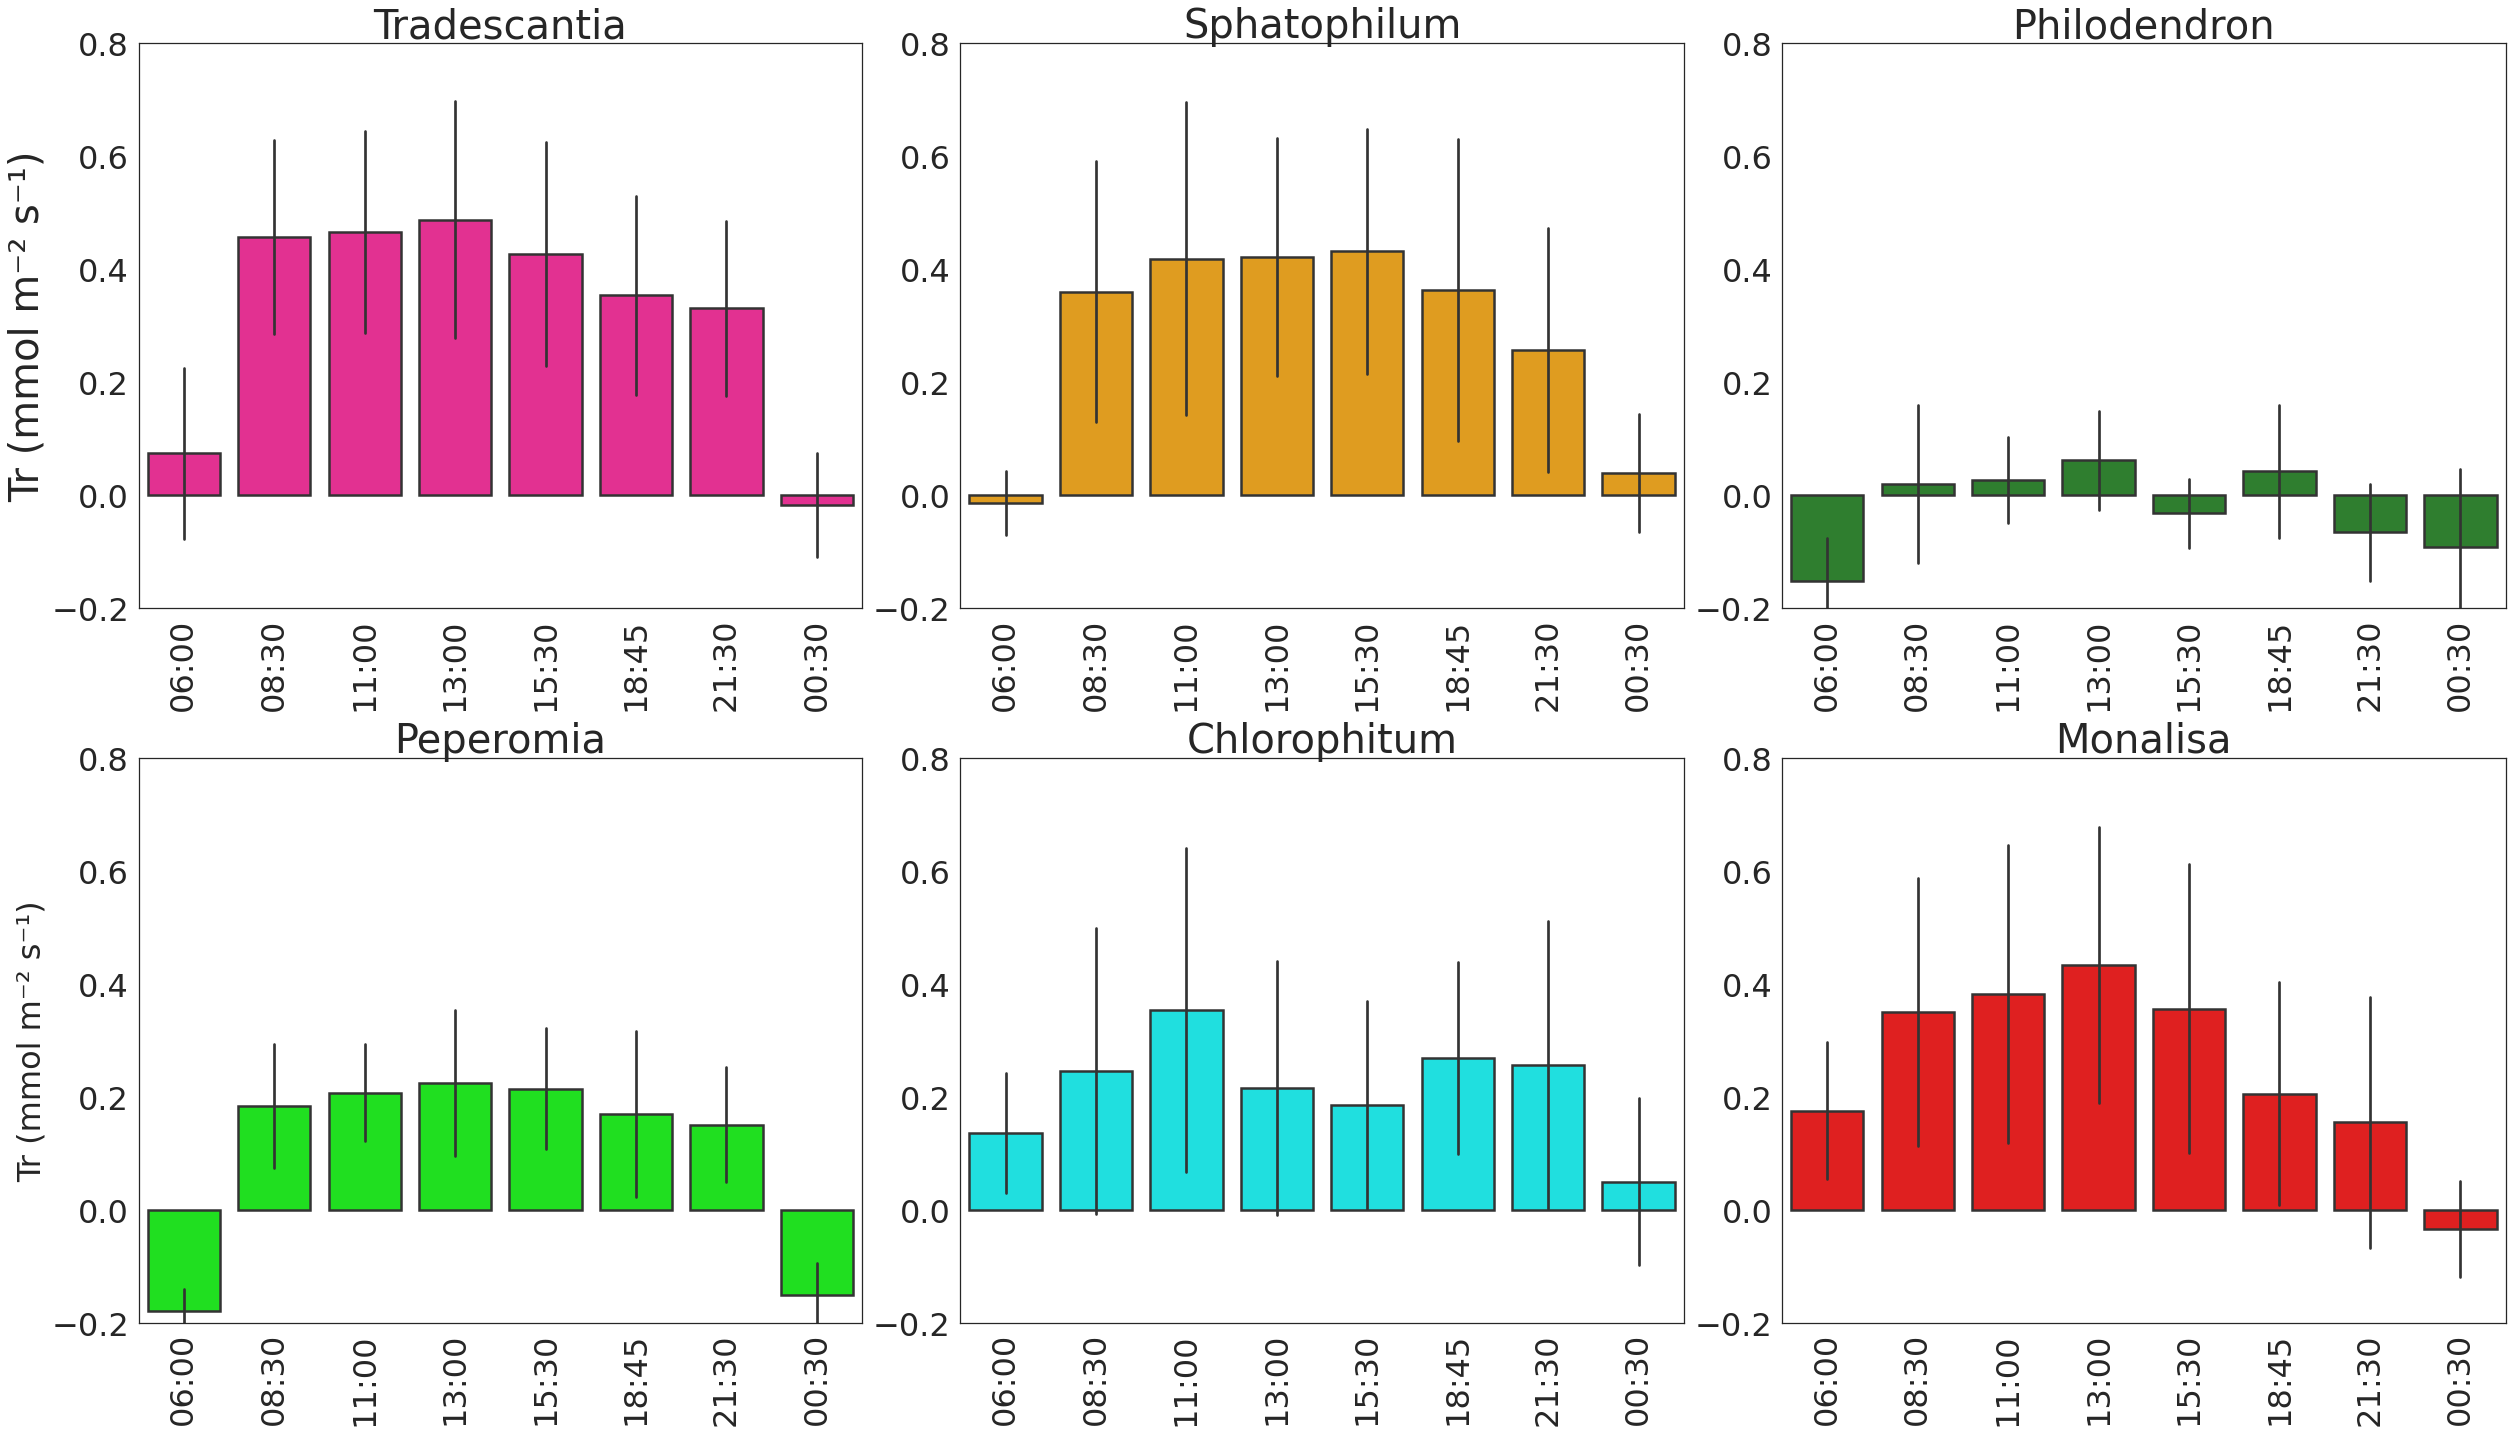

In [ ]:
# All graphs togather averaged:
fig, axes = plt.subplots(2, 3, figsize=(35,20))
a = sns.barplot(ax=axes[0, 0], x="Hour", y="E_apparent", data=df_dict['Tradescantia'], ci="sd", color= 'deeppink',errcolor=".2", edgecolor=".2",linewidth=2.5)
a.set_title('Tradescantia',fontsize=40)
a.set_xlabel('',fontsize=32)
a.set_ylabel('Tr (mmol m⁻² s⁻¹)',fontsize=40)
a.set_ylim(-0.2,0.8)
a.tick_params(axis='x', rotation=90)
b = sns.barplot(ax=axes[0, 1], x="Hour", y="E_apparent", data=df_dict['Sphatophilum'], ci="sd", color="Orange",errcolor=".2", edgecolor=".2",linewidth=2.5)
b.set_title('Sphatophilum',fontsize=40)
b.set_xlabel('',fontsize=32)
b.set_ylabel('',fontsize=32)
b.set_ylim(-0.2,0.8)
b.tick_params(axis='x', rotation=90)
c = sns.barplot(ax=axes[0, 2], x="Hour", y="E_apparent", data=df_dict['Philodendron'], ci="sd", color="forestgreen",errcolor=".2", edgecolor=".2",linewidth=2.5)
c.set_title('Philodendron',fontsize=40)
c.set_xlabel('',fontsize=32)
c.set_ylabel('',fontsize=32)
c.set_ylim(-0.2,0.8)
c.tick_params(axis='x', rotation=90)
d = sns.barplot(ax=axes[1, 0], x="Hour", y="E_apparent", data=df_dict['Peperomia'], ci="sd", color="lime",errcolor=".2", edgecolor=".2",linewidth=2.5)
d.set_title('Peperomia',fontsize=40)
d.set_xlabel('',fontsize=32)
d.set_ylabel('Tr (mmol m⁻² s⁻¹)',fontsize=32)
d.set_ylim(-0.2,0.8)
d.tick_params(axis='x', rotation=90)
e = sns.barplot(ax=axes[1, 1], x="Hour", y="E_apparent", data=df_dict['Chlorophitum'], ci="sd", color="cyan",errcolor=".2", edgecolor=".2",linewidth=2.5)
e.set_title('Chlorophitum',fontsize=40)
e.set_xlabel('',fontsize=32)
e.set_ylabel('',fontsize=32)
e.set_ylim(-0.2,0.8)
e.tick_params(axis='x', rotation=90)
f = sns.barplot(ax=axes[1, 2], x="Hour", y="E_apparent", data=df_dict['Monalisa'], ci="sd", color="red",errcolor=".2", edgecolor=".2",linewidth=2.5)
f.set_title('Monalisa',fontsize=40)
f.set_xlabel('',fontsize=32)
f.set_ylabel('',fontsize=32)
f.set_ylim(-0.2,0.8)
f.tick_params(axis='x', rotation=90)
# plt.gcf().autofmt_xdate()  # makes slated dates
plt.tight_layout()
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/Tr/'
plt.savefig(save_results_to +'All_together_average.png')

## **Li6800 - A**

In [ ]:
# creat df for li6800 data:
file_path = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Li6800/Li6800_all_data.xlsx'
dfA = pd.read_excel(file_path) # reading the raw date (xlsx)
dfA['Hour'] = pd.to_datetime(dfA.Hour,format='%H:%M:%S')
dfA['Hour'] = dfA['Hour'].dt.strftime('%H:%M') #change the format to hours:minutes
# dfA['Hour'] = pd.to_datetime(dfA.Hour,format='%H:%M')
# dfA.describe()
dfA.dtypes

Date         int64
Hour        object
species     object
A          float64
dtype: object

Export data to $CO_2$ analysis - do not delete!

In [ ]:
# fig, ax = plt.subplots(1, figsize=(13,7))
# time = np.asarray([8.5,11,13,15.5,18.75,21]) # array of hours for x axis
# by_time = pd.DataFrame()
# by_time["Avg"] = dfA.groupby(dfA.Hour)["A"].mean()
# by_time["std"] = dfA.groupby(dfA.Hour)["A"].std()
# by_time['time'] = time
# by_time.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/df_A_data.xlsx")
# # plots
# ax.fill_between(by_time_avg.index,
#                 by_time_avg["A"] + by_time_std["A"],
#                 by_time_avg["A"]-by_time_std["A"],alpha=.1)
# ax.plot(by_time_avg['A'],lw=2)
# # graph adjustments and labels:
# ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
# ax.set_title('Hourly mean $CO_2$ in distribution')
# ax.set_ylabel('')
# ax.set_xlabel('Hour')
# plt.legend()
# # plt.savefig(save_results_to + '3groups_overday',bbox_inches = "tight")

In [ ]:
# create a list of species name:
species = dfA['species'].drop_duplicates()
species= species.values.tolist() # connert array to list
species

['Tradescantia',
 'Peperomia',
 'Spathiphyllum',
 'Philodendron',
 'Monalisa',
 'Chlorophytum']

In [ ]:
for i in species:
  species_df = dfA[dfA['species']== i]
  fig, ax = plt.subplots(1, figsize=(10,7))
  ax = sns.barplot(x="Hour", y="A", hue="Date", data=species_df,ci="sd", palette="PuRd")
  ax.set(xlabel="Hour",
       ylabel="A ($\mu$mol m⁻² s⁻¹)",
       title=i);
  plt.legend(loc='best')
  plt.xticks(rotation=90)
  save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/A/'
  plt.savefig(save_results_to +i+'.png')
  

In [ ]:
df_dict = {i:dfA[dfA['species']== i] for i in species}
df_dict.keys()

dict_keys(['Tradescantia', 'Peperomia', 'Spathiphyllum', 'Philodendron', 'Monalisa', 'Chlorophytum'])

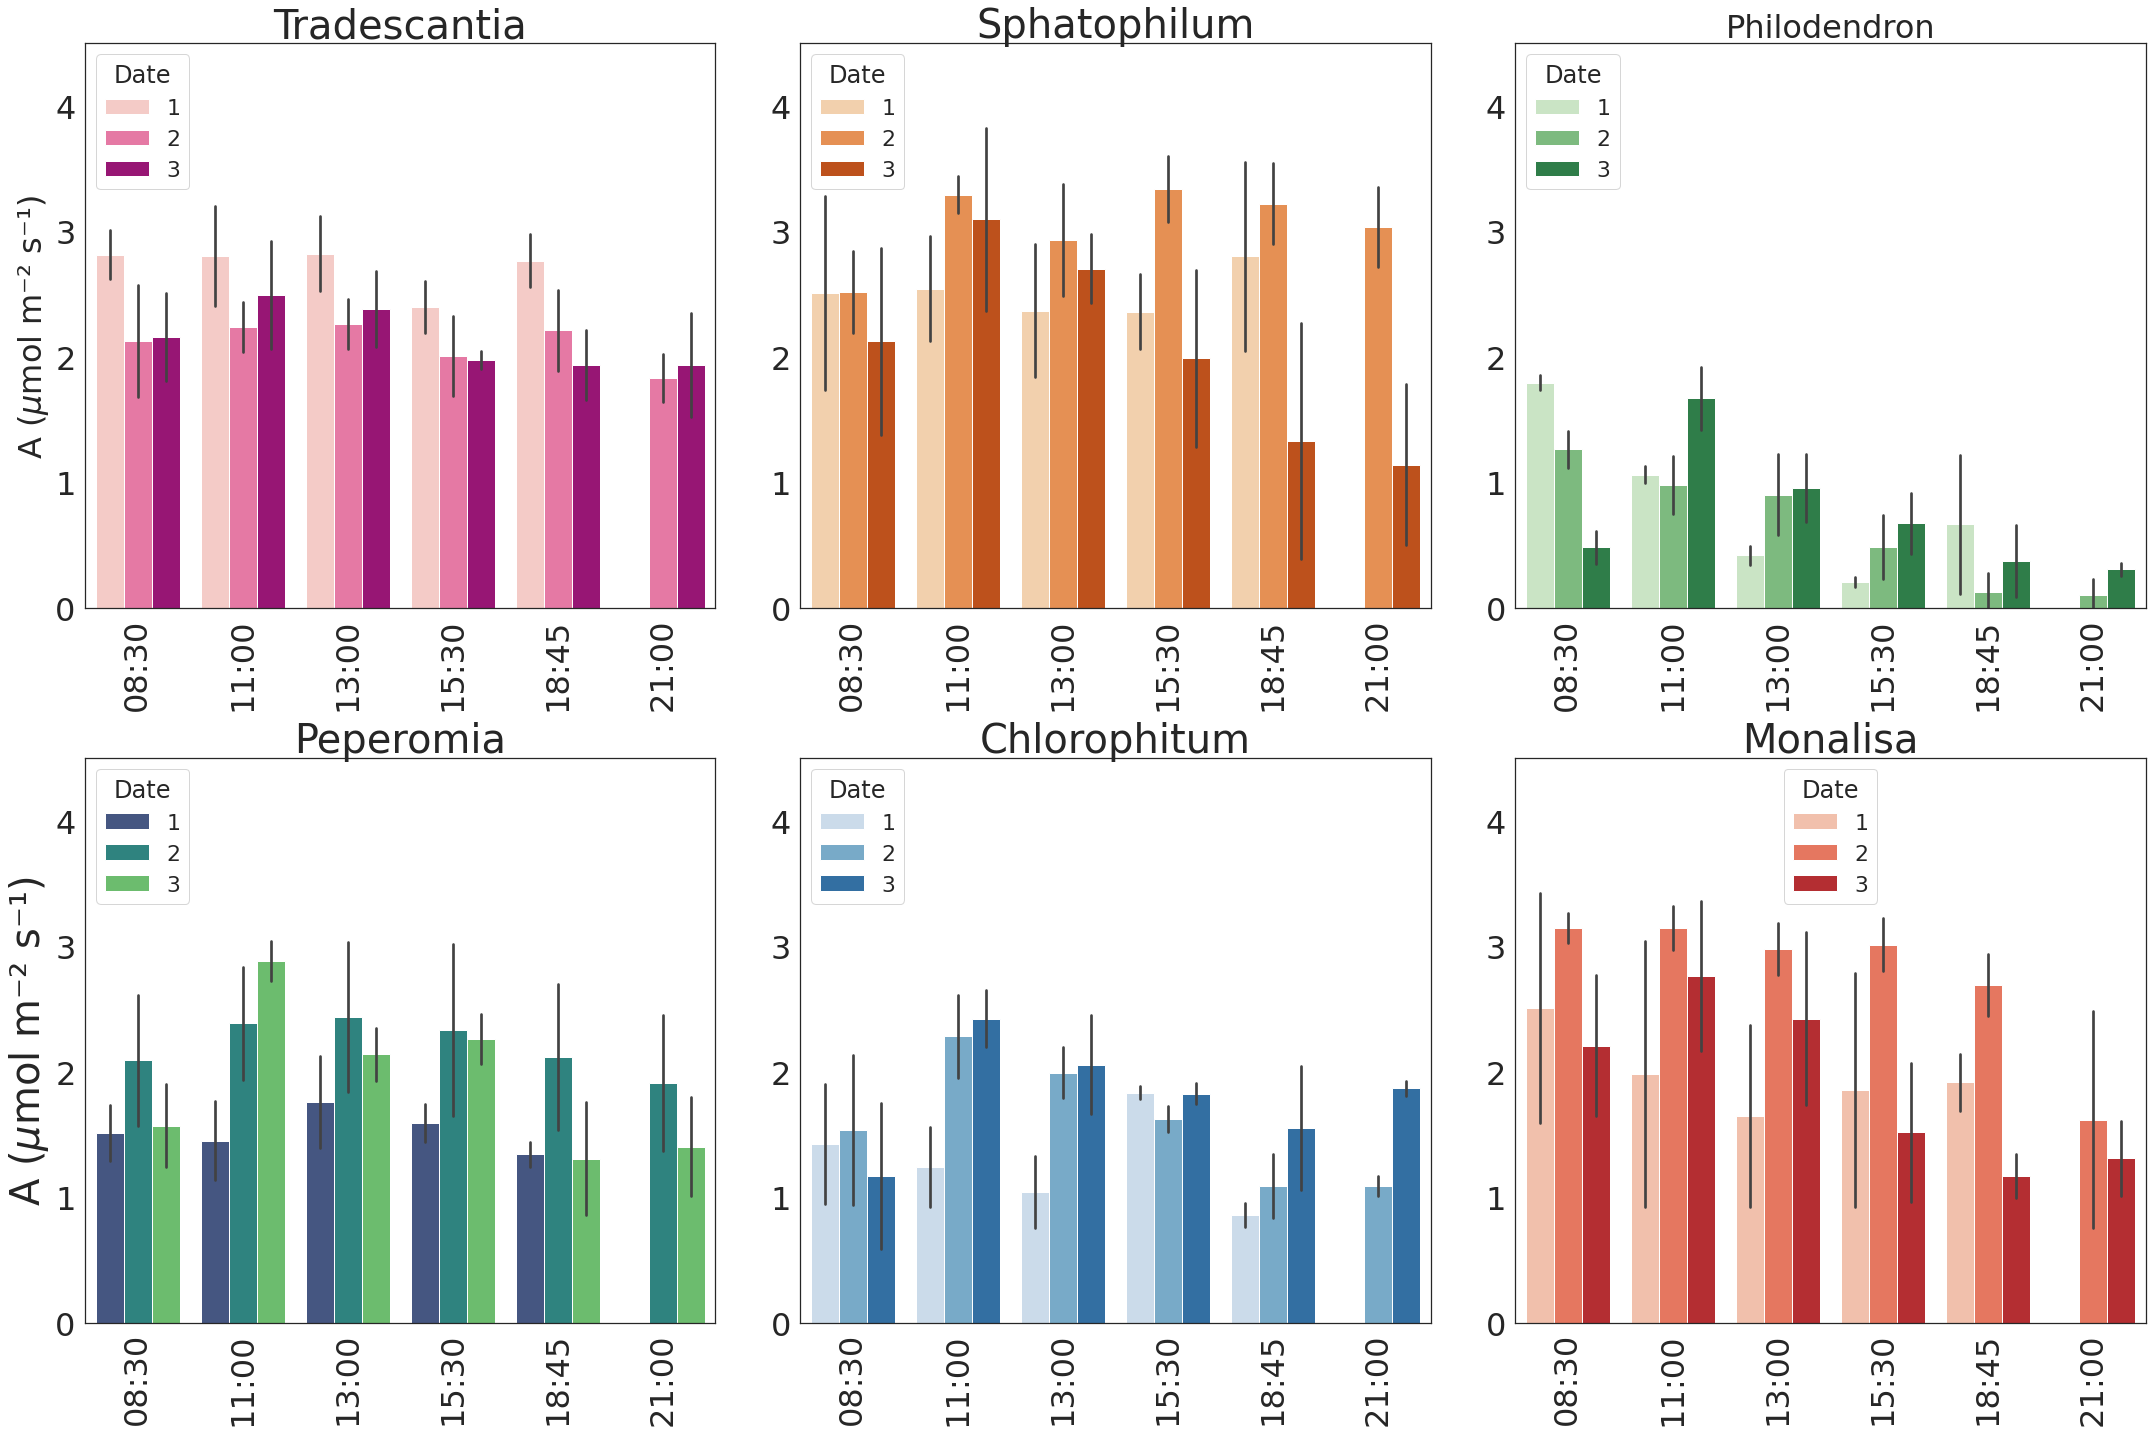

In [ ]:
# All graphs togather
fig, axes = plt.subplots(2, 3, figsize=(30,20))
a = sns.barplot(ax=axes[0, 0], x="Hour", y="A", hue="Date", data=df_dict['Tradescantia'], ci="sd", palette="RdPu")
a.set_title('Tradescantia',fontsize=40)
a.set_xlabel('',fontsize=32)
a.set_ylim(-0.2,0.9)
a.set_ylabel('A ($\mu$mol m⁻² s⁻¹)',fontsize=32)
a.set_ylim(0,4.5)
a.tick_params(axis='x', rotation=90)
b = sns.barplot(ax=axes[0, 1], x="Hour", y="A", hue="Date", data=df_dict['Spathiphyllum'], ci="sd", palette="Oranges")
b.set_title('Sphatophilum',fontsize=40)
b.set_xlabel('',fontsize=32)
b.set_ylabel(' ',fontsize=40)
b.set_ylim(0,4.5)
b.tick_params(axis='x', rotation=90)
c = sns.barplot(ax=axes[0, 2], x="Hour", y="A", hue="Date", data=df_dict['Philodendron'], ci="sd", palette="Greens")
c.set_title('Philodendron',fontsize=32)
c.set_xlabel('',fontsize=32)
c.set_ylabel(' ',fontsize=32)
c.set_ylim(0,4.5)
c.tick_params(axis='x', rotation=90)
d = sns.barplot(ax=axes[1, 0], x="Hour", y="A", hue="Date", data=df_dict['Peperomia'], ci="sd", palette="viridis")
d.set_title('Peperomia',fontsize=40)
d.set_xlabel('',fontsize=32)
d.set_ylabel('A ($\mu$mol m⁻² s⁻¹)',fontsize=40)
d.set_ylim(0,4.5)
d.tick_params(axis='x', rotation=90)
e = sns.barplot(ax=axes[1, 1], x="Hour", y="A", hue="Date", data=df_dict['Chlorophytum'], ci="sd", palette="Blues")
e.set_title('Chlorophitum',fontsize=40)
e.set_xlabel('',fontsize=32)
e.set_ylabel(' ',fontsize=32)
e.set_ylim(0,4.5)
e.tick_params(axis='x', rotation=90)
f = sns.barplot(ax=axes[1, 2], x="Hour", y="A", hue="Date", data=df_dict['Monalisa'], ci="sd", palette="Reds")
f.set_title('Monalisa',fontsize=40)
f.set_xlabel('',fontsize=32)
f.set_ylabel(' ',fontsize=32)
f.set_ylim(0,4.5)
f.tick_params(axis='x', rotation=90)
# plt.gcf().autofmt_xdate()  # makes slated dates
plt.tight_layout()
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/A/'
plt.savefig(save_results_to +'All_together.png')

Now we present the results wuth the average of all dates:

In [ ]:
for i in species:
  species_df = dfA[dfA['species']== i]
  fig, ax = plt.subplots(1, figsize=(10,7))
  ax = sns.barplot(x="Hour", y="A", data=species_df,ci="sd", color="deeppink",linewidth=2.5,
                 errcolor=".2", edgecolor=".2")
  ax.set(xlabel="Hour",
       ylabel="A (mol*m⁻²*s⁻¹)",
       title=i + " A over hours");
  ax.set_ylim(0,4.5)
  # plt.legend(loc='best')
  save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/A/'
  plt.savefig(save_results_to +i+'average.png')

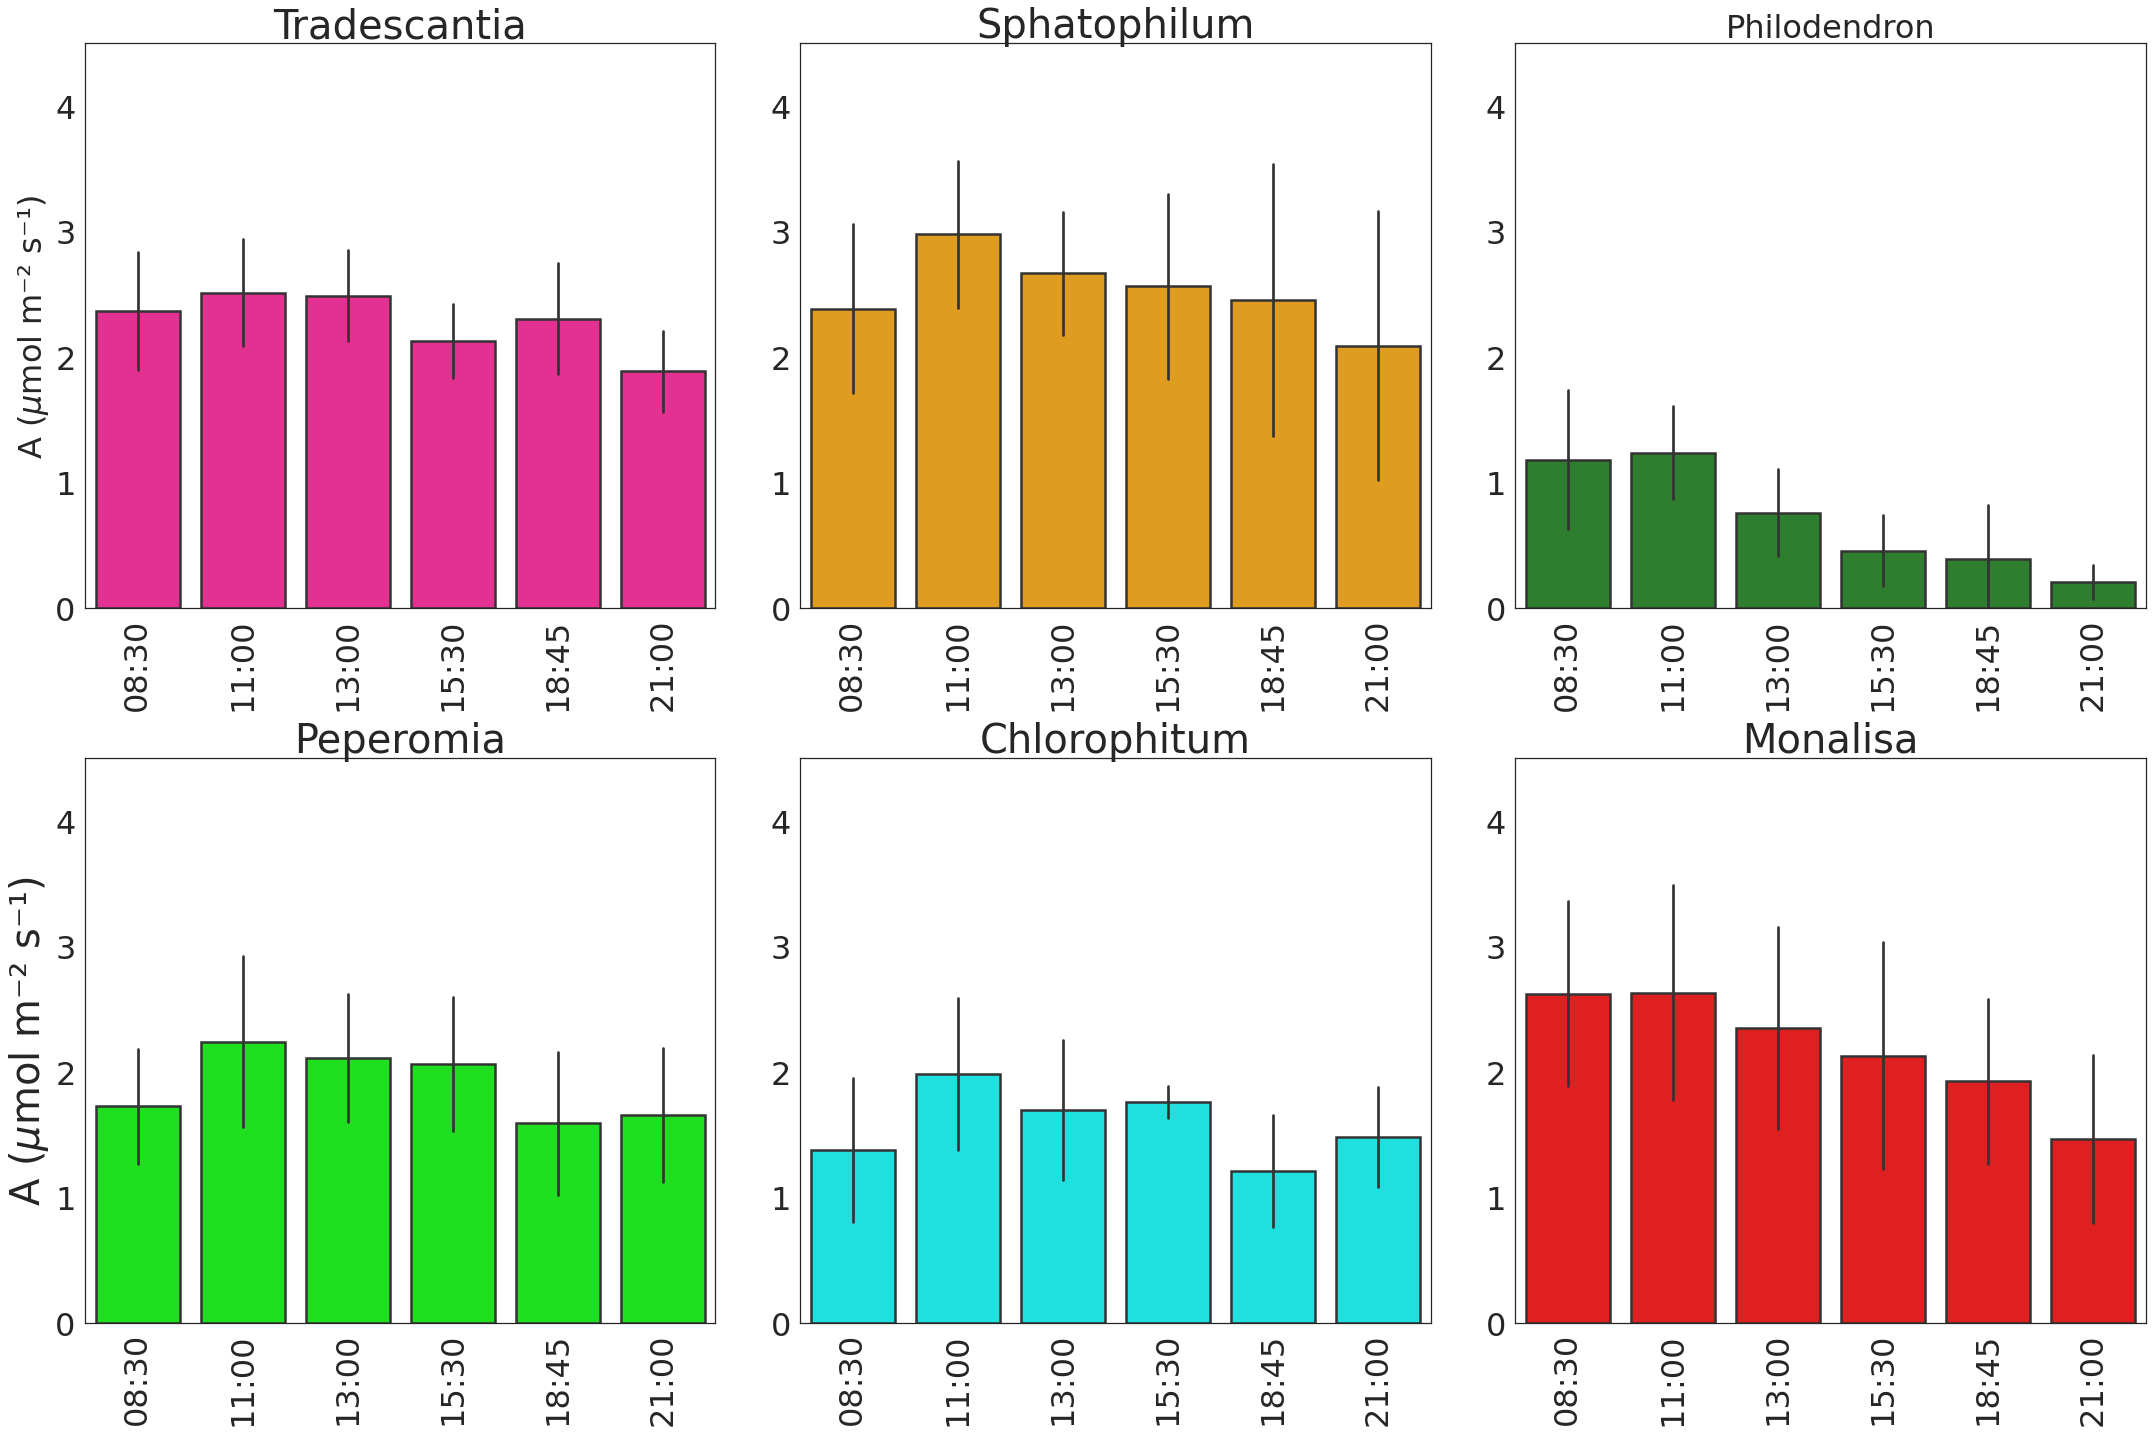

In [ ]:
# All graphs togather
fig, axes = plt.subplots(2, 3, figsize=(30,20))
a = sns.barplot(ax=axes[0, 0], x="Hour", y="A", data=df_dict['Tradescantia'], ci="sd", color= 'deeppink',errcolor=".2", edgecolor=".2",linewidth=2.5)
a.set_title('Tradescantia',fontsize=40)
a.set_xlabel('',fontsize=32)
a.set_ylabel('A ($\mu$mol m⁻² s⁻¹)',fontsize=32)
a.set_ylim(0,4.5)
a.tick_params(axis='x', rotation=90)
b = sns.barplot(ax=axes[0, 1], x="Hour", y="A", data=df_dict['Spathiphyllum'], ci="sd", color="Orange",errcolor=".2", edgecolor=".2",linewidth=2.5)
b.set_title('Sphatophilum',fontsize=40)
b.set_xlabel('',fontsize=32)
b.set_ylabel(' ',fontsize=40)
b.set_ylim(0,4.5)
b.tick_params(axis='x', rotation=90)
c = sns.barplot(ax=axes[0, 2], x="Hour", y="A", data=df_dict['Philodendron'], ci="sd", color="forestgreen",errcolor=".2", edgecolor=".2",linewidth=2.5)
c.set_title('Philodendron',fontsize=32)
c.set_xlabel('',fontsize=32)
c.set_ylabel(' ',fontsize=32)
c.set_ylim(0,4.5)
c.tick_params(axis='x', rotation=90)
d = sns.barplot(ax=axes[1, 0], x="Hour", y="A", data=df_dict['Peperomia'], ci="sd", color="lime",errcolor=".2", edgecolor=".2",linewidth=2.5)
d.set_title('Peperomia',fontsize=40)
d.set_xlabel('',fontsize=32)
d.set_ylabel('A ($\mu$mol m⁻² s⁻¹)',fontsize=40)
d.set_ylim(0,4.5)
d.tick_params(axis='x', rotation=90)
e = sns.barplot(ax=axes[1, 1], x="Hour", y="A", data=df_dict['Chlorophytum'], ci="sd", color="cyan",errcolor=".2", edgecolor=".2",linewidth=2.5)
e.set_title('Chlorophitum',fontsize=40)
e.set_xlabel('',fontsize=32)
e.set_ylabel(' ',fontsize=32)
e.set_ylim(0,4.5)
e.tick_params(axis='x', rotation=90)
f = sns.barplot(ax=axes[1, 2], x="Hour", y="A", data=df_dict['Monalisa'], ci="sd", color="red",errcolor=".2", edgecolor=".2",linewidth=2.5)
f.set_title('Monalisa',fontsize=40)
f.set_xlabel('',fontsize=32)
f.set_ylabel(' ',fontsize=32)
f.set_ylim(0,4.5)
f.tick_params(axis='x', rotation=90)
# f.set_xticklabels(x,rotation = 45)
# plt.gcf().autofmt_xdate()  # makes slated dates
plt.tight_layout()
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/li_cor/A_full_day_experiment/Graphs/A/'
plt.savefig(save_results_to +'All_together_average.png')